In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [133]:
ls

Airlines+Data.xlsx
CocaCola_Sales_Rawdata.xlsx
Forecasting for Passenger Data set .ipynb
Problem_statement.txt
Untitled.ipynb


In [134]:
Air_data=pd.read_excel("Airlines+Data.xlsx")
Air_data.columns=['Month','Passengers']
Air_data['Month']=pd.to_datetime(Air_data['Month'],format='%y-%m')
Air_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [135]:
Air_data = Air_data.set_index('Month')

In [136]:
Air_data.isna().sum()

Passengers    0
dtype: int64

# Time Series Annlysis

# Plot

<AxesSubplot:xlabel='Month'>

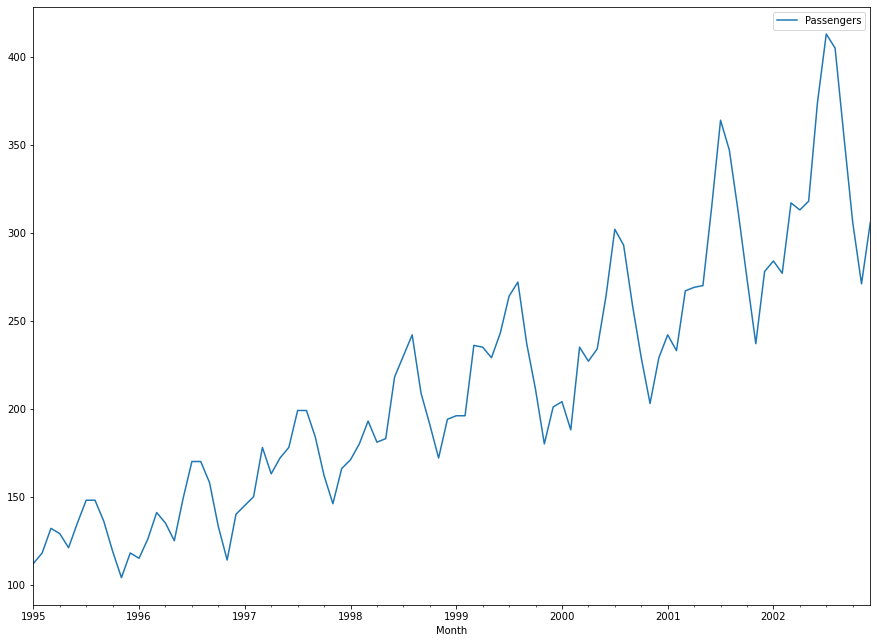

In [137]:
Air_data.plot(figsize=(15,11))

There are no null Values in data

In [138]:
# Finding Outliers

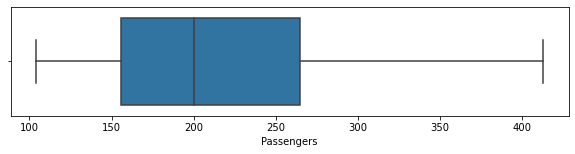

In [139]:
figure=plt.subplots(figsize=(10,2))
ax=sns.boxplot(Air_data['Passengers'],whis=1.5)

In [140]:
# histogram 

<AxesSubplot:>

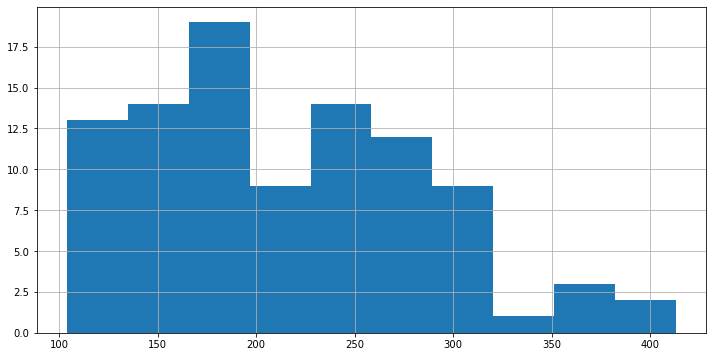

In [141]:
Air_data['Passengers'].hist(figsize=(12,6))

# Time Series Decomposition

## Additive Seasonal Decomposition

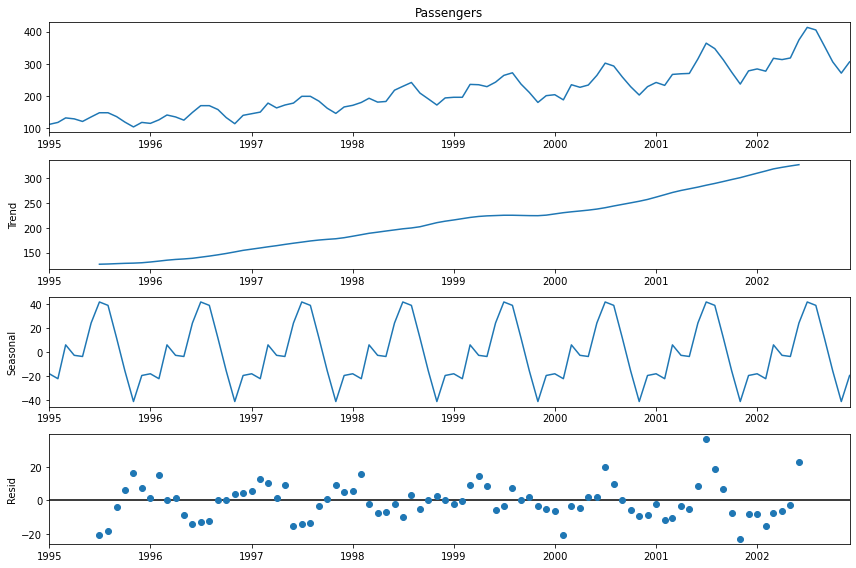

In [142]:
from pylab import rcParams
import statsmodels.api as sm 
rcParams['figure.figsize']=12,8
decomposition =sm.tsa.seasonal_decompose(Air_data['Passengers'],model='additive')
fig=decomposition.plot()
plt.show()

Seasonal Varies from +40 to -40 with mean 0

## Multiplicative Seasonal Decomposition


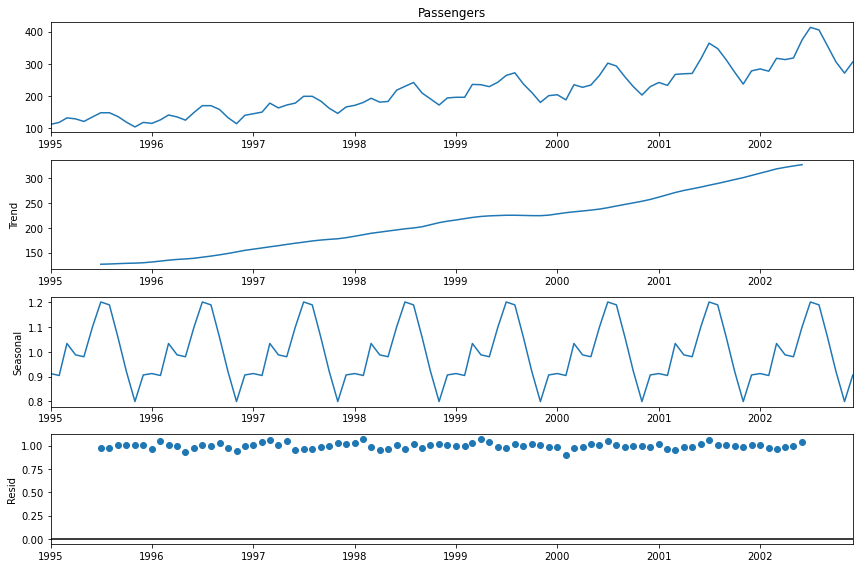

In [143]:
decomposition=sm.tsa.seasonal_decompose(Air_data['Passengers'],model='multiplicative')
fig=decomposition.plot()
plt.show()

# Build Time Series Forecast with Different model 

###  Splitting the data as train and test

In [144]:
Air_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [145]:
train_len=67
train=Air_data[0:train_len]


In [146]:
test=Air_data[train_len:]

In [147]:
train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [148]:
test.head()

,Passengers
Month,
2000-08-01,293
2000-09-01,259
2000-10-01,229
2000-11-01,203
2000-12-01,229


#  1 Simple Average Method

In [149]:
y_hat_avg=test.copy()

In [150]:
y_hat_avg['avg_forecast']=train['Passengers'].mean()

In [151]:
y_hat_avg.head()

,Passengers,avg_forecast
Month,,
2000-08-01,293,178.447761
2000-09-01,259,178.447761
2000-10-01,229,178.447761
2000-11-01,203,178.447761
2000-12-01,229,178.447761


### Plotting train ,test and forecast

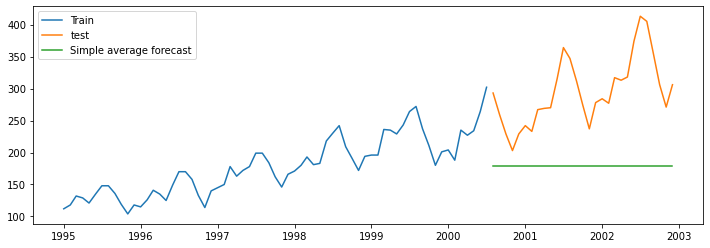

In [152]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

with simple average we dont get results closer what actual results are

### RMSE for simple average

In [153]:
from sklearn.metrics import mean_squared_error

In [154]:
rmse=np.sqrt(mean_squared_error(test['Passengers'],y_hat_avg['avg_forecast'])).round()

In [155]:
final_results = pd.DataFrame({'Method':['Simple_average'], 'RMSE':[rmse]})
final_results

,Method,RMSE
0,Simple_average,128.0


# 2 Simple Moving average

Considering the last observation in the time series has more impact on the future rather than the first observation, in the simple moving average method, we take the average of only the last observations to forecast the future.



In [156]:
y_hat_sma =Air_data.copy()

In [157]:
# Moving average window. 
window=12
y_hat_sma['sma_forecast']=data['Passengers'].rolling(window).mean()

In [158]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

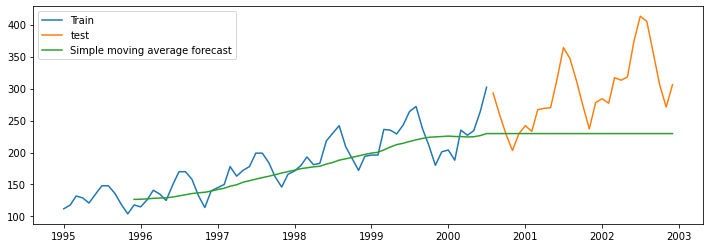

In [159]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

we can see simple moving average give little better result ,the sesonal effect cannot be captured

### RMSE for simple moving average

In [160]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

83.6

In [161]:
final_results = results.append({'Method':'Simple moving average method', 'RMSE':rmse}, ignore_index=True)
final_results

,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


In [162]:
window_=[]
rmse_res=[]

y_hatsma=Air_data.copy()
for window in range(1,24):
 #   if window%2 !=0:
        y_hatsma[window]=data['Passengers'].rolling(window).mean()
        y_hatsma[window][train_len:] = y_hatsma[window][train_len-1]
        rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hatsma[window][train_len:])).round(2)
        
        window_.append(window)
        rmse_res.append(rmse)
        

In [163]:
summary=pd.DataFrame()
summary['window']=window_
summary['rsme']=rmse_res

In [164]:
summary

,window,rsme
0,1,52.29
1,2,53.25
2,3,59.16
3,4,64.52
4,5,67.21
5,6,74.50
6,7,78.45
7,8,81.81
8,9,86.35
9,10,87.56


# Exponential Smoothing Family 
## 1 Simple Exponential Smoothing 

In [165]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Instantiate the model
model = SimpleExpSmoothing(train['Passengers'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2000-08-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  29 non-null     int64
dtypes: int64(1)
memory usage: 464.0 bytes


In [167]:
y_hat_ses = test.copy()
# Forecast for 24 months
y_hat_ses['ses_forecast'] = model_fit.forecast(29)

In [168]:
y_hat_ses['ses_forecast']

Month
2000-08-01    243.707605
2000-09-01    243.707605
2000-10-01    243.707605
2000-11-01    243.707605
2000-12-01    243.707605
2001-01-01    243.707605
2001-02-01    243.707605
2001-03-01    243.707605
2001-04-01    243.707605
2001-05-01    243.707605
2001-06-01    243.707605
2001-07-01    243.707605
2001-08-01    243.707605
2001-09-01    243.707605
2001-10-01    243.707605
2001-11-01    243.707605
2001-12-01    243.707605
2002-01-01    243.707605
2002-02-01    243.707605
2002-03-01    243.707605
2002-04-01    243.707605
2002-05-01    243.707605
2002-06-01    243.707605
2002-07-01    243.707605
2002-08-01    243.707605
2002-09-01    243.707605
2002-10-01    243.707605
2002-11-01    243.707605
2002-12-01    243.707605
Name: ses_forecast, dtype: float64

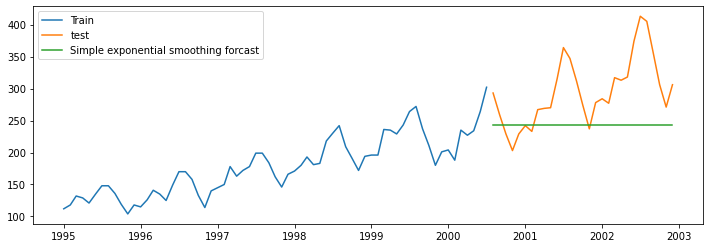

In [169]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### RSME for Exponential smoothening 

In [170]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
rmse


73.05

In [171]:
final_results = results.append({'Method':'Simple expenential smoothing method', 'RMSE':rmse}, ignore_index=True)
final_results

,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


### Double Exponential smoothening 

It Captures both level and trend

In [172]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [173]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal=None)

In [174]:
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [175]:
y_hat_holt = test.copy()
# We are forecasting for next 24 months
y_hat_holt['holt_forecast'] = model_fit.forecast(29)

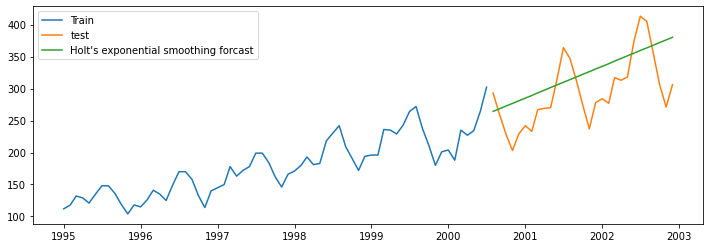

In [176]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

we capture trend here but not seasonality

In [177]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
rmse

49.44

In [178]:
final_results = results.append({'Method':'Holt\'s expenential smoothing method', 'RMSE':rmse}, ignore_index=True)
final_results

,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


## Holt-Winters's Exponential Smoothing


It Capture level , trend , Seasonality

### Additive method


In [179]:
y_hat_hwa = test.copy()

In [180]:
# We have to pass an array of the dataframe into the ExponentialSmoothing instance
# seasonal_periods = 12. Because the seasonality is on yearly basis. If the seasonality would have quarterly basis then seasonal_periods = 4 (4 quarters in an year)
# seasonal=additive for additive method
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal='additive')



In [181]:
# optimized=True . Here we are letting the system choose the optimal alpha, beta and gamma parameter.
model_fit = model.fit(optimized=True)

In [182]:
model_fit.params

{'smoothing_level': 0.8173141186337474,
 'smoothing_trend': 3.1112447018333953e-09,
 'smoothing_seasonal': 1.681427676669968e-10,
 'damping_trend': nan,
 'initial_level': 156.77990289150458,
 'initial_trend': 2.076845383727493,
 'initial_seasons': array([-46.6000955 , -46.1760197 , -22.08622122, -31.66295527,
        -34.74042339, -16.31697823,   2.6068266 ,   3.83519091,
        -19.64160071, -43.31837735, -65.39527854, -46.87277222]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [183]:
# Forecast for last 24 months
y_hat_hwa['hwa_forecast'] = model_fit.forecast(29)

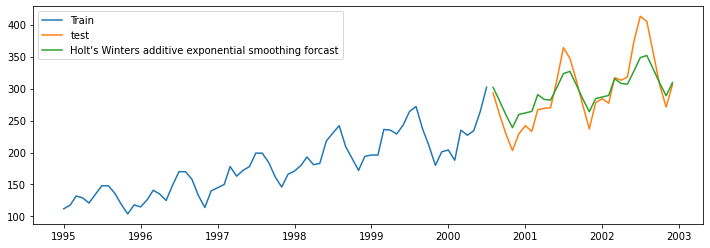

In [184]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


it captured trend ,seasonality and level too

In [185]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwa_forecast'])).round(2)
rmse

25.9

In [186]:
final_results = results.append({'Method':'Holt\'s Winter additive method', 'RMSE':rmse}, ignore_index=True)
final_results


,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


### Multiplicative method


In [187]:
y_hat_hwm = test.copy()

In [188]:
# seasonal=mul for multiplicative method
# trend='add' . We are not changing the trend. We are only chaning the seasonal from additive to multiplicative.
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='add', seasonal='mul')

In [189]:
model_fit = model.fit(optimized=True)


In [190]:
model_fit.params


{'smoothing_level': 0.6786219674387126,
 'smoothing_trend': 1.684264985977346e-11,
 'smoothing_seasonal': 1.478966428429852e-07,
 'damping_trend': nan,
 'initial_level': 116.74264858778513,
 'initial_trend': 1.8034816695031475,
 'initial_seasons': array([0.95099097, 0.94720095, 1.09669552, 1.04392882, 1.03165687,
        1.13558245, 1.24446181, 1.25247065, 1.10426067, 0.96778357,
        0.83977173, 0.94675922]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [191]:
# Forecast for last 24 months
y_hat_hwm['hwm_forecast'] = model_fit.forecast(29)



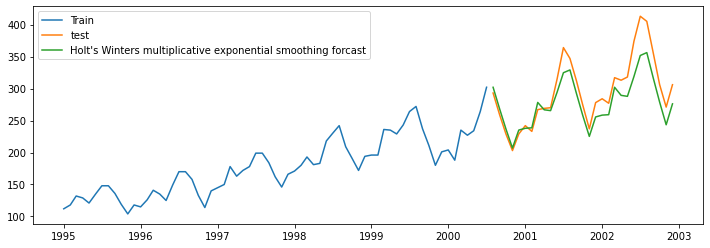

In [192]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


we can see the prediction is pretty close to real values with sesonality and trend 

In [193]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hwm_forecast'])).round(2)
rmse


26.17

In [194]:
final_results = results.append({'Method':'Holt\'s Winter multiplicative method', 'RMSE':rmse}, ignore_index=True)
final_results

,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


## We can see that both holts winter Additive and multiplicative methods are give very good for forecasting

# Time Series Forecasting - II


## Auto Regressive Model (AR)


## Sationary vs Non-Stationary Time Series

### 1 visual checking 

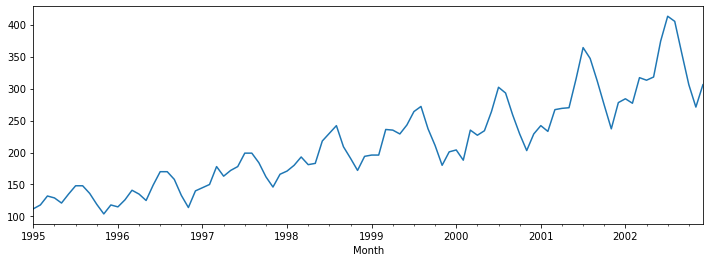

In [195]:
Air_data['Passengers'].plot(figsize=(12,4))
plt.show()

### we can se that trend is not constant and variance also not constant so we can say that series is non stationary

### 2. Augmented Dickey-Fuller (ADF) Test to check series is staionary or not


Null Hypothesis (H0): The series is not stationary

p-val > 0.05

Alternate Hypothesis (H1): The series is stationary

p-val <= 0.05



In [196]:
from statsmodels.tsa.stattools import adfuller


In [197]:
adf_test = adfuller(Air_data['Passengers'])
adf_test


(1.3402479596467005,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [198]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: 1.340248
p-value: 0.996825
Critical value @ 0.05: -2.90


p-value (0.99) > critical value(0.05) .

Failed to reject null hypothesis (The series is not stationary)

Hence, the time series is Non-Stationary.

## Converting Non-Stationary to Stationary Time Series


## Box Cox Transformation

### Box-Cox transformation makes the variance constant in a series.



In [199]:
from scipy.stats import boxcox


In [200]:
# Creating a new dataset with the boxcox
data_boxcox = pd.Series(boxcox(Air_data['Passengers'], lmbda=0), Air_data.index)
data_boxcox.head()

Month
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791
dtype: float64

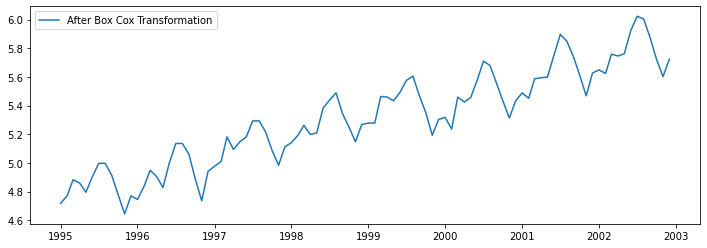

In [201]:
# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

The variance become constant, 
we can make the mean same by differencing 

### Differencing

Differencing is performed by subtracting the previous observation from the current observation.

Differencing removes trend and seasonality in a Time series. When an entire cycle is used for differencing the other cycle, then the seasonality is removed.



In [202]:
# data_boxcox - data_boxcox.shift() :- Performs difference between the previous and current observations.
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)

In [203]:
# As the first record becomes null. Hence removing the frist observation.
data_boxcox_diff.dropna(inplace=True)

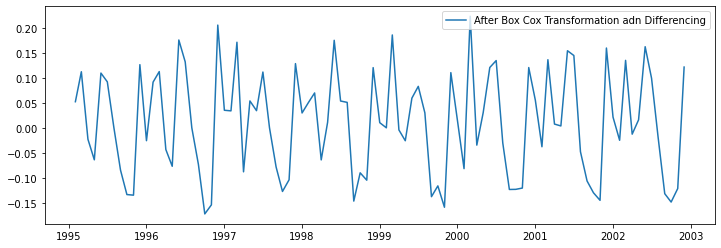

In [204]:
# Plotting the Time series after Box Cox transformation and Differencing
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()


Here we removed the upword trend,now it become constant

## Autocorrelation

### Autocorrelation function (ACF)


Autocorrelation function captures both direct and indirect relationship with its lagged values.



In [205]:
from statsmodels.graphics.tsaplots import plot_acf

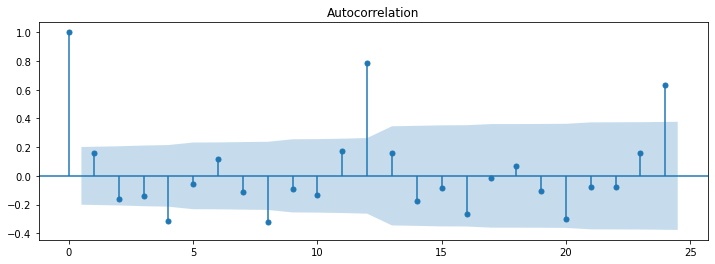

In [206]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=24)
plt.show()


ACF captures both direct and indirect correlation with the lag time.


## Partial autocorrelation function (PACF)


Captures only direct correlation.



In [207]:
from statsmodels.graphics.tsaplots import plot_pacf

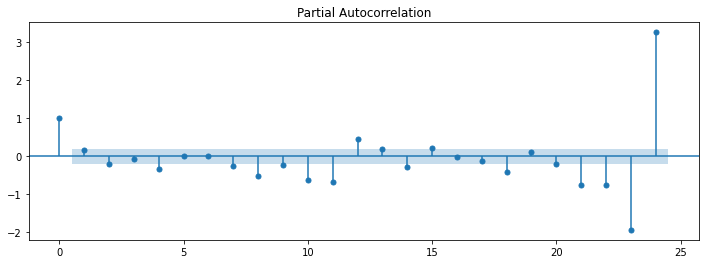

In [208]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=24)
plt.show()

Little change in the correlation plot. Because PACF only captures the direct correlation with the time lag. It bypasses the tile lags in between.


## Building the Regression Model


### Splitting Stationary dataset into train and test set


In [209]:
# Splitting data_boxcox
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

In [210]:
# Splitting data_boxcox_diff

# Taking train_len-1 because we have deleted the forst observation
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [211]:
train_data_boxcox

Month
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791
                ...   
2000-03-01    5.459586
2000-04-01    5.424950
2000-05-01    5.455321
2000-06-01    5.575949
2000-07-01    5.710427
Length: 67, dtype: float64

In [212]:
test_data_boxcox

Month
2000-08-01    5.680173
2000-09-01    5.556828
2000-10-01    5.433722
2000-11-01    5.313206
2000-12-01    5.433722
2001-01-01    5.488938
2001-02-01    5.451038
2001-03-01    5.587249
2001-04-01    5.594711
2001-05-01    5.598422
2001-06-01    5.752573
2001-07-01    5.897154
2001-08-01    5.849325
2001-09-01    5.743003
2001-10-01    5.613128
2001-11-01    5.468060
2001-12-01    5.627621
2002-01-01    5.648974
2002-02-01    5.624018
2002-03-01    5.758902
2002-04-01    5.746203
2002-05-01    5.762051
2002-06-01    5.924256
2002-07-01    6.023448
2002-08-01    6.003887
2002-09-01    5.872118
2002-10-01    5.723585
2002-11-01    5.602119
2002-12-01    5.723585
dtype: float64

# Simple Auto Regressive Model (AR)


In [213]:
from statsmodels.tsa.arima_model import ARIMA


In [214]:
# p = 1 . We are calculating only one lag time period 
# q = 0 . We have already made the time series as Stationary
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))

In [215]:
model_fit = model.fit()
model_fit.params

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.73826D-01    |proj g|=  5.52084D-02

At iterate    5    f= -8.73846D-01    |proj g|=  5.49449D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     15      1     0     0   4.441D-08  -8.738D-01
  F = -0.87384592241484838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


const      0.015306
ar.L1.y    0.104930
dtype: float64

### Forecast

In [216]:
y_hat_ar = data_boxcox_diff.copy()

In [217]:
# We are predicting for all the observations train and test set both just to visualise the regression line
# The index column represents the timestamp. So, we are taking all the timestamps from first(index.min) to last(index.max)
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())


In [218]:
# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

In [219]:
# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

In [220]:
# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])


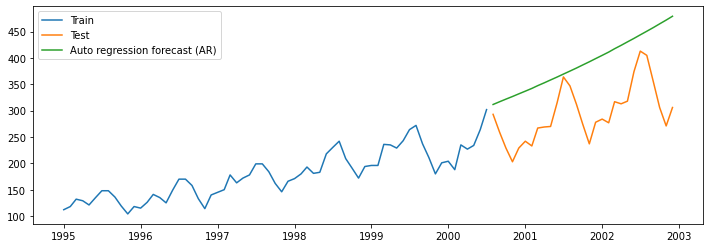

In [221]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()


In [222]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
rmse

105.2

In [223]:
final_results = results.append({'Method':'Auto regressive (AR) method', 'RMSE':rmse}, ignore_index=True)
final_results

,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


## Moving Average method (MA)

In [224]:
# q parameter = 1 MA(1) model
# If q = 3 , then it would be MA(3) model
# p = 0 and d = 0 As we are not considering these two parameters in this model.
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))



In [225]:
model_fit = model.fit()
model_fit.params

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.76253D-01    |proj g|=  1.13501D-03

At iterate    5    f= -8.76257D-01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     10      1     0     0   0.000D+00  -8.763D-01
  F = -0.87625677353180698     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


const      0.015313
ma.L1.y    0.148836
dtype: float64

In [226]:
y_hat_ma = data_boxcox_diff.copy()

In [227]:
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

### Recover original time series forecast


In [228]:
# Removing Differencing
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()

In [229]:
# Adding the first Ovservation
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

In [230]:
# Removing the transformation
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

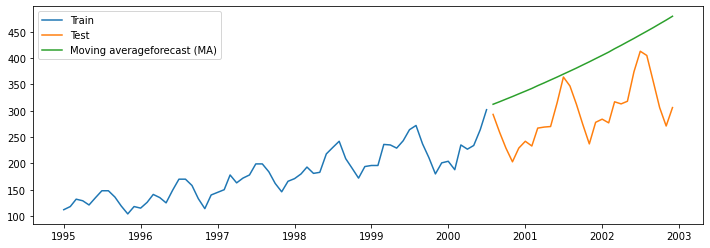

In [231]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving averageforecast (MA)')
plt.legend(loc='best')
plt.show()

### no sesonality capture

In [232]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
rmse

105.39

In [233]:
final_results = results.append({'Method':'Moving average (MA) method', 'RMSE':rmse}, ignore_index=True)
final_results

,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


## Auto Regressive Moving Average (ARMA)


In [234]:
# p=1 and q=1
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))

In [235]:
model_fit = model.fit()
model_fit.params

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.28462D-01    |proj g|=  1.10596D+01

At iterate    5    f= -9.37421D-01    |proj g|=  1.83575D-01

At iterate   10    f= -9.37902D-01    |proj g|=  1.98759D+00

At iterate   15    f= -9.38707D-01    |proj g|=  5.01957D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     28      1     0     0   6.439D-07  -9.387D-01
  F = -0.93870682616826384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


const      0.012148
ar.L1.y    0.669913
ma.L1.y   -1.000000
dtype: float64

In [236]:
y_hat_arma = data_boxcox_diff.copy()

In [237]:
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# Reverse the differencing
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()

In [238]:
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])

In [239]:
# Reverse the transformation
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])


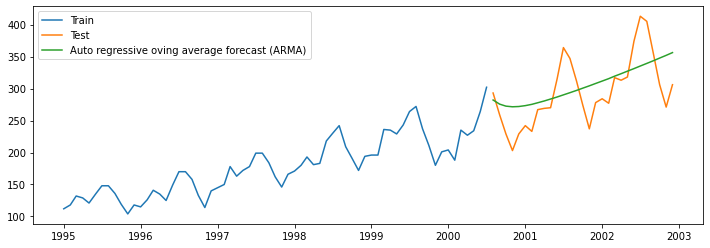

In [240]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto regressive oving average forecast (ARMA)')
plt.legend(loc='best')
plt.show()

In [241]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
rmse



42.77

In [242]:
final_results = results.append({'Method':'Auto regressive moving average (ARMA) method', 'RMSE':rmse}, ignore_index=True)
final_results

,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


## Auto Regressive Integrated Moving Average (ARIMA)


In [243]:
# Passing only the transformed boxcox data. Because ARIMA automatically performing the differencing.
# p = 1
# q = 1
# d = 1   , We are doing only one order differencing.
model = ARIMA(train_data_boxcox, order=(1,1,1))

In [244]:
model_fit = model.fit()
model_fit.params

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.28462D-01    |proj g|=  1.10596D+01

At iterate    5    f= -9.37421D-01    |proj g|=  1.83575D-01

At iterate   10    f= -9.37902D-01    |proj g|=  1.98759D+00

At iterate   15    f= -9.38707D-01    |proj g|=  5.01957D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     28      1     0     0   6.439D-07  -9.387D-01
  F = -0.93870682616826384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


const        0.012148
ar.L1.D.y    0.669913
ma.L1.D.y   -1.000000
dtype: float64

In [245]:
y_hat_arima = data_boxcox_diff.copy()

In [246]:
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# Reverse the differencing
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
# Reverse the transformation
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

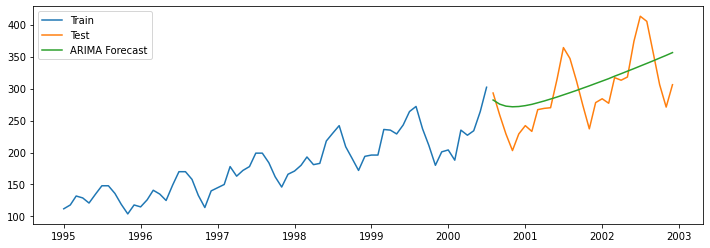

In [247]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [248]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
rmse

42.77

In [249]:
final_results = results.append({'Method':'ARIMA method', 'RMSE':rmse}, ignore_index=True)
final_results



,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


# Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [250]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [251]:
# We are only passing the Box Cox because the ARIMAX will perform the differencing internally
# seasonal_order P=1, Q=1, D=1 and m=12
# m=12 . Because the seasonality is monthly.
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))

In [252]:
model_fit = model.fit()
model_fit.params

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24634D+00    |proj g|=  2.95212D+00

At iterate    5    f= -1.27735D+00    |proj g|=  3.90087D+00

At iterate   10    f= -1.30714D+00    |proj g|=  1.02550D-01

At iterate   15    f= -1.30808D+00    |proj g|=  6.73518D-01

At iterate   20    f= -1.30898D+00    |proj g|=  3.13291D-01

At iterate   25    f= -1.31621D+00    |proj g|=  1.47662D+00

At iterate   30    f= -1.32068D+00    |proj g|=  2.68382D-02

At iterate   35    f= -1.32068D+00    |proj g|=  1.64900D-02

At iterate   40    f= -1.32094D+00    |proj g|=  6.07206D-01

At iterate   45    f= -1.32243D+00    |proj g|=  3.76036D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -1.32291D+00    |proj g|=  2.76192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     97      2     0     0   2.762D-02  -1.323D+00
  F =  -1.3229116687614701     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


ar.L1       0.090323
ma.L1      -0.463562
ar.S.L12   -0.284488
ma.S.L12   -0.366070
sigma2      0.001995
dtype: float64

In [253]:
# We are copying data_boxcox_diff because we have to compare the test data with the Stationary version of the series (Transformation + Differencing)
y_hat_sarima = data_boxcox_diff.copy()

In [254]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [255]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])


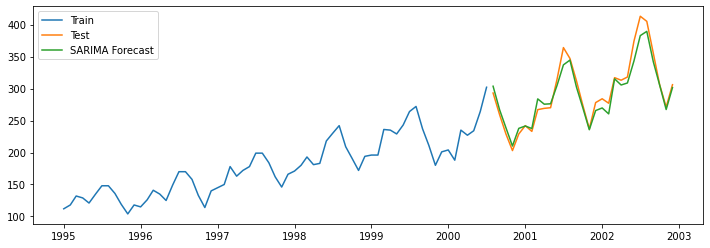

In [256]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


In [257]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
rmse


12.91

In [258]:
final_results = results.append({'Method':'SARIMA method', 'RMSE':rmse}, ignore_index=True)
final_results

,Method,RMSE
0,Simple_average,128.00
1,Simple moving average method,83.60
2,Simple expenential smoothing method,73.05
3,Holt's expenential smoothing method,49.44
4,Holt's Winter additive method,25.90
5,Holt's Winter multiplicative method,26.17
6,Auto regressive (AR) method,105.20
7,Moving average (MA) method,105.39
8,Auto regressive moving average (ARMA) method,42.77
9,ARIMA method,42.77


## So above table we can see that Sarima model gives decent RMSE score 